## Load Libraries

In [1]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

## Load WBA Data

In [2]:
# re upload files everytime run

uploaded = files.upload()

Saving X_test.csv to X_test.csv
Saving X_train.csv to X_train.csv
Saving y_test.csv to y_test.csv
Saving y_train.csv to y_train.csv


In [3]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

frames_X = [X_train, X_test]
frames_y = [y_train, y_test]

X = pd.concat(frames_X)
y = pd.concat(frames_y)

print(X.shape)
print(y.shape)

(191, 120)
(191, 1)
(48, 120)
(48, 1)
(239, 120)
(239, 1)


## SMOTE Oversampling

In [4]:
print(Counter(y['OverallPoF']))

sm = SMOTE(random_state=42, sampling_strategy = {0:5000, 1:5000})

X_smote, y_smote = sm.fit_resample(X, y)

print(Counter(y_smote['OverallPoF']))

Counter({0: 201, 1: 38})
Counter({1: 5000, 0: 5000})


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (5000) in class 0 will be larger than the number of samples in the majority class (class #0 -> 201)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (5000) in class 1 will be larger than the number of samples in the majority class (class #0 -> 201)
  f"After over-sampling, the number of samples ({n_samples})"


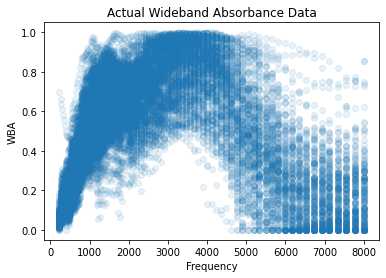

In [12]:
X_long = pd.melt(X[y['OverallPoF'] == 0], id_vars=['Gender','AgeY','ECV','TPP','SC','TympType','OAE1','OAE1.4','OAE2','OAE2.8','OAE4','Ear coded','Pressure'], value_vars=['f(226.0000)','f(226.0000)','f(257.3256)','f(280.6155)','f(297.3018)','f(324.2099)','f(343.4884)','f(363.9133)','f(385.5527)','f(408.4789)','f(432.7683)','f(458.5020)','f(471.9372)','f(500.0000)','f(514.6511)','f(545.2539)','f(561.2310)','f(577.6763)','f(594.6036)','f(629.9605)','f(648.4198)','f(667.4199)','f(686.9768)','f(707.1068)','f(727.8266)','f(749.1535)','f(771.1054)','f(793.7005)','f(816.9577)','f(840.8964)','f(865.5366)','f(890.8987)','f(917.0040)','f(943.8743)','f(971.5319)','f(1000.0000)','f(1029.3022)','f(1059.4631)','f(1090.5077)','f(1122.4620)','f(1155.3527)','f(1189.2071)','f(1224.0535)','f(1259.9210)','f(1296.8396)','f(1334.8399)','f(1373.9536)','f(1414.2136)','f(1455.6532)','f(1498.3071)','f(1542.2108)','f(1587.4011)','f(1633.9155)','f(1681.7928)','f(1731.0731)','f(1781.7974)','f(1834.0081)','f(1887.7486)','f(1943.0639)','f(2000.0000)','f(2058.6045)','f(2118.9262)','f(2181.0155)','f(2244.9241)','f(2310.7054)','f(2378.4142)','f(2448.1071)','f(2519.8421)','f(2593.6791)','f(2669.6797)','f(2747.9073)','f(2828.4271)','f(2911.3064)','f(2996.6142)','f(3084.4217)','f(3174.8021)','f(3267.8309)','f(3363.5857)','f(3462.1462)','f(3563.5949)','f(3668.0162)','f(3775.4973)','f(3886.1278)','f(4000.0000)','f(4117.2089)','f(4237.8524)','f(4362.0309)','f(4489.8482)','f(4621.4108)','f(4756.8285)','f(4896.2142)','f(5039.6842)','f(5187.3582)','f(5339.3594)','f(5495.8146)','f(5656.8542)','f(5822.6127)','f(5993.2283)','f(6168.8433)','f(6349.6042)','f(6535.6618)','f(6727.1713)','f(6924.2925)','f(7127.1897)','f(7336.0323)','f(7550.9945)','f(7772.2555)','f(8000.0000)'],var_name='Frequency', value_name='WBA')
X_long['Frequency'] = X_long['Frequency'].str[2:-1].astype(float)

fig, ax = plt.subplots()
scatter = ax.scatter(X_long["Frequency"], X_long["WBA"], alpha=0.1)
ax.set_xlabel("Frequency")
ax.set_ylabel("WBA")
ax.set_title("Actual Wideband Absorbance Data")
plt.show()

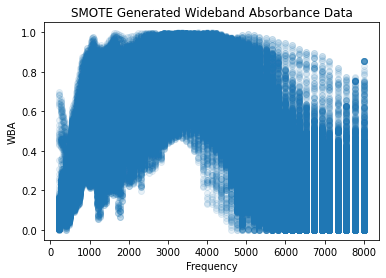

In [13]:
X_smote['Subject'] = np.arange(len(X_smote))
X_smote_long = pd.melt(X_smote[y_smote['OverallPoF'] == 0], id_vars=['Subject','Gender','AgeY','ECV','TPP','SC','TympType','OAE1','OAE1.4','OAE2','OAE2.8','OAE4','Ear coded','Pressure'], value_vars=['f(226.0000)','f(226.0000)','f(257.3256)','f(280.6155)','f(297.3018)','f(324.2099)','f(343.4884)','f(363.9133)','f(385.5527)','f(408.4789)','f(432.7683)','f(458.5020)','f(471.9372)','f(500.0000)','f(514.6511)','f(545.2539)','f(561.2310)','f(577.6763)','f(594.6036)','f(629.9605)','f(648.4198)','f(667.4199)','f(686.9768)','f(707.1068)','f(727.8266)','f(749.1535)','f(771.1054)','f(793.7005)','f(816.9577)','f(840.8964)','f(865.5366)','f(890.8987)','f(917.0040)','f(943.8743)','f(971.5319)','f(1000.0000)','f(1029.3022)','f(1059.4631)','f(1090.5077)','f(1122.4620)','f(1155.3527)','f(1189.2071)','f(1224.0535)','f(1259.9210)','f(1296.8396)','f(1334.8399)','f(1373.9536)','f(1414.2136)','f(1455.6532)','f(1498.3071)','f(1542.2108)','f(1587.4011)','f(1633.9155)','f(1681.7928)','f(1731.0731)','f(1781.7974)','f(1834.0081)','f(1887.7486)','f(1943.0639)','f(2000.0000)','f(2058.6045)','f(2118.9262)','f(2181.0155)','f(2244.9241)','f(2310.7054)','f(2378.4142)','f(2448.1071)','f(2519.8421)','f(2593.6791)','f(2669.6797)','f(2747.9073)','f(2828.4271)','f(2911.3064)','f(2996.6142)','f(3084.4217)','f(3174.8021)','f(3267.8309)','f(3363.5857)','f(3462.1462)','f(3563.5949)','f(3668.0162)','f(3775.4973)','f(3886.1278)','f(4000.0000)','f(4117.2089)','f(4237.8524)','f(4362.0309)','f(4489.8482)','f(4621.4108)','f(4756.8285)','f(4896.2142)','f(5039.6842)','f(5187.3582)','f(5339.3594)','f(5495.8146)','f(5656.8542)','f(5822.6127)','f(5993.2283)','f(6168.8433)','f(6349.6042)','f(6535.6618)','f(6727.1713)','f(6924.2925)','f(7127.1897)','f(7336.0323)','f(7550.9945)','f(7772.2555)','f(8000.0000)'],var_name='Frequency', value_name='WBA')
X_smote_long['Frequency'] = X_smote_long['Frequency'].str[2:-1].astype(float)

fig, ax = plt.subplots()
scatter = ax.scatter(X_smote_long["Frequency"], X_smote_long["WBA"], alpha=0.1)
ax.set_xlabel("Frequency")
ax.set_ylabel("WBA")
ax.set_title("SMOTE Generated Wideband Absorbance Data")
plt.show()

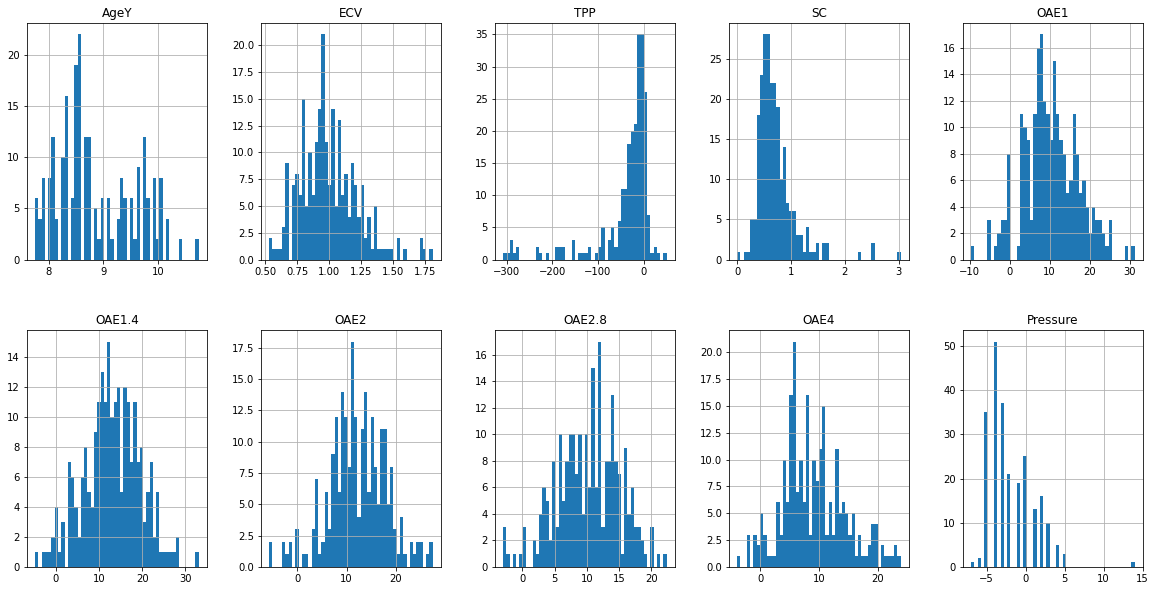

In [21]:
# List of all control variables
cont_cols = [c for c in X.columns if c[:2] != "f("]

# List of all binary columns
bin_cols = ["Gender", "TympType", "Ear coded"]

# Remove binary columns from cont_cols
for bin_col in bin_cols:
    cont_cols.remove(bin_col)

X[cont_cols].hist(bins=50, figsize=(20,10), layout=(2,5))
plt.show();

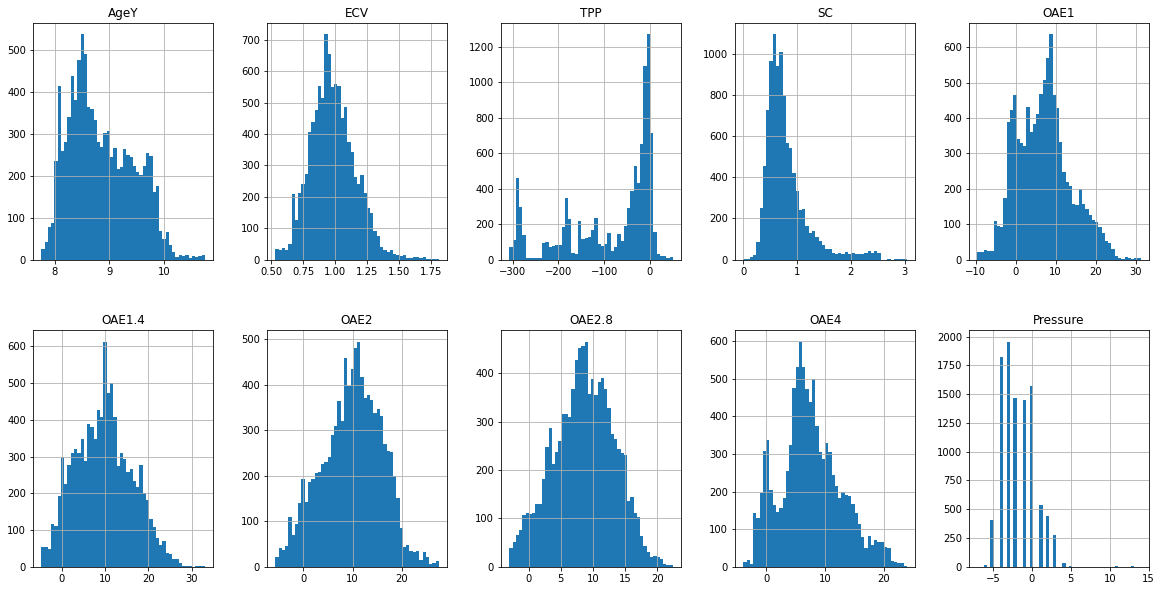

In [20]:
X_smote[cont_cols].hist(bins=50, figsize=(20,10), layout=(2,5))
plt.show();

In [9]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=0)
for train_index, test_index in sss.split(X_smote, y_smote):
  X_train_smote, X_test_smote = X_smote.iloc[train_index,], X_smote.iloc[test_index,]
  y_train_smote, y_test_smote = y_smote.iloc[train_index,], y_smote.iloc[test_index,]

print(X_train_smote.shape)
print(y_train_smote.shape)
print(X_test_smote.shape)
print(y_test_smote.shape)

(8500, 121)
(8500, 1)
(1500, 121)
(1500, 1)


In [10]:
X_train_smote.to_csv('X_train_smote.csv')
y_train_smote.to_csv('y_train_smote.csv')
X_test_smote.to_csv('X_test_smote.csv')
y_test_smote.to_csv('y_test_smote.csv')